In [1]:
import seaborn as sns
import numba
import joblib
from helper_functions import *
import numpy as np
from pathlib import Path
import h5py
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

/Users/sinanbasaran/Documents/GitHub/demo-LCDB1.1/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
### hyperparameter
OPENML_ID = {0: '3', 1: '6', 2: '11', 3: '12', 4: '13', 5: '14', 6: '15', 7: '16', 8: '18', 9: '21', 10: '22', 11: '23', 12: '24', 13: '26', 14: '28', 15: '29', 16: '30', 17: '31', 18: '32', 19: '36', 20: '37', 21: '38', 22: '44', 23: '46', 24: '50', 25: '54', 26: '55', 27: '57', 28: '60', 29: '61', 30: '151', 31: '179', 32: '180', 33: '181', 34: '182', 35: '184', 36: '185', 37: '188', 38: '201', 39: '273', 40: '293', 41: '299', 42: '300', 43: '307', 44: '336', 45: '346', 46: '351', 47: '354', 48: '357', 49: '380', 50: '389', 51: '390', 52: '391', 53: '392', 54: '393', 55: '395', 56: '396', 57: '398', 58: '399', 59: '401', 60: '446', 61: '458', 62: '469', 63: '554', 64: '679', 65: '715', 66: '718', 67: '720', 68: '722', 69: '723', 70: '727', 71: '728', 72: '734', 73: '735', 74: '737', 75: '740', 76: '741', 77: '743', 78: '751', 79: '752', 80: '761', 81: '772', 82: '797', 83: '799', 84: '803', 85: '806', 86: '807', 87: '813', 88: '816', 89: '819', 90: '821', 91: '822', 92: '823', 93: '833', 94: '837', 95: '843', 96: '845', 97: '846', 98: '847', 99: '849', 100: '866', 101: '871', 102: '881', 103: '897', 104: '901', 105: '903', 106: '904', 107: '910', 108: '912', 109: '913', 110: '914', 111: '917', 112: '923', 113: '930', 114: '934', 115: '953', 116: '958', 117: '959', 118: '962', 119: '966', 120: '971', 121: '976', 122: '977', 123: '978', 124: '979', 125: '980', 126: '991', 127: '993', 128: '995', 129: '1000', 130: '1002', 131: '1018', 132: '1019', 133: '1020', 134: '1021', 135: '1036', 136: '1040', 137: '1041', 138: '1042', 139: '1049', 140: '1050', 141: '1053', 142: '1056', 143: '1063', 144: '1067', 145: '1068', 146: '1069', 147: '1083', 148: '1084', 149: '1085', 150: '1086', 151: '1087', 152: '1088', 153: '1116', 154: '1119', 155: '1120', 156: '1128', 157: '1130', 158: '1134', 159: '1138', 160: '1139', 161: '1142', 162: '1146', 163: '1161', 164: '1166', 165: '1216', 166: '1233', 167: '1235', 168: '1236', 169: '1441', 170: '1448', 171: '1450', 172: '1457', 173: '1461', 174: '1462', 175: '1464', 176: '1465', 177: '1468', 178: '1475', 179: '1477', 180: '1478', 181: '1479', 182: '1480', 183: '1483', 184: '1485', 185: '1486', 186: '1487', 187: '1488', 188: '1489', 189: '1494', 190: '1497', 191: '1499', 192: '1501', 193: '1503', 194: '1509', 195: '1510', 196: '1515', 197: '1566', 198: '1567', 199: '1575', 200: '1590', 201: '1592', 202: '1597', 203: '4134', 204: '4135', 205: '4137', 206: '4534', 207: '4538', 208: '4541', 209: '6332', 210: '23381', 211: '23512', 212: '23517', 213: '40498', 214: '40499', 215: '40664', 216: '40668', 217: '40670', 218: '40672', 219: '40677', 220: '40685', 221: '40687', 222: '40701', 223: '40713', 224: '40900', 225: '40910', 226: '40923', 227: '40927', 228: '40966', 229: '40971', 230: '40975', 231: '40978', 232: '40979', 233: '40981', 234: '40982', 235: '40983', 236: '40984', 237: '40994', 238: '40996', 239: '41027', 240: '41142', 241: '41143', 242: '41144', 243: '41145', 244: '41146', 245: '41150', 246: '41156', 247: '41157', 248: '41158', 249: '41159', 250: '41161', 251: '41163', 252: '41164', 253: '41165', 254: '41166', 255: '41167', 256: '41168', 257: '41169', 258: '41228', 259: '41972', 260: '42734', 261: '42742', 262: '42769', 263: '42809', 264: '42810'}
LEARNER_ZOO = {0: 'SVC_linear', 1: 'SVC_poly', 2: 'SVC_rbf', 3: 'SVC_sigmoid', 4: 'Decision Trees', 5: 'ExtraTrees', 6: 'LogisticRegression', 7: 'PassiveAggressive', 8: 'Perceptron', 9: 'RidgeClassifier', 10: 'SGDClassifier', 11: 'MLP', 12: 'LDA', 13: 'QDA', 14: 'BernoulliNB', 15: 'MultinomialNB', 16: 'ComplementNB', 17: 'GaussianNB', 18: 'KNN', 19: 'NearestCentroid', 20: 'ens.ExtraTrees', 21: 'ens.RandomForest', 22: 'ens.GradientBoosting', 23: 'DummyClassifier'}
ANCHOR_SIZE = np.ceil(16 * 2 ** ((np.arange(137)) / 8)).astype(int)

### load data: validation accuracy
mean_valid_lc_nofs =np.nanmean(h5py.File(Path.cwd() / 'dataset/LCDB11_ACC_265_noFS_raw_compress.hdf5', 'r')['accuracy'][...][:,:,:,:,:,2], axis=(2, 3))

mean_valid_lc_nofs.shape

(265, 24, 137)

In [8]:
# load and reshape validation, training, and test data
data_path = Path.cwd() / 'dataset/LCDB11_ACC_265_noFS_raw_compress.hdf5'
with h5py.File(data_path, 'r') as f:
    train_raw = np.nanmean(f['accuracy'][...][:,:,:,:,:,0], axis=(2, 3))
    valid_raw = np.nanmean(f['accuracy'][...][:,:,:,:,:,1], axis=(2, 3))
    test_raw  = np.nanmean(f['accuracy'][...][:,:,:,:,:,2], axis=(2, 3))

train_curves = train_raw.reshape(-1, train_raw.shape[-1])
valid_curves = valid_raw.reshape(-1, valid_raw.shape[-1])
test_curves  = test_raw.reshape(-1,  test_raw.shape[-1])

labels = np.tile(np.arange(24), 265)

In [9]:
all_accuracies = []
all_confusion_matrices = []
all_classification_reports = []
all_label_pairs = []

for label_a, label_b in get_all_pairs():
    cleaned_curves, cleaned_labels = clean_curves(train_curves, labels, 50, [label_a, label_b])
    
    if len(cleaned_curves) == 0:
        continue  # skip empty cases
    
    MAX_LEN = max(len(c) for c in cleaned_curves)

    # pad sequences
    padded_curves = pad_sequences(cleaned_curves, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post')
    
    # convert to numpy arrays
    X = np.array(padded_curves)
    y = np.array(cleaned_labels)
    X, y = shuffle(X, y, random_state=42)

    clf = RocketClassifier(rocket_transform='minirocket')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True, target_names=[LEARNER_ZOO[i] for i in [label_a, label_b]])

    # store results
    all_accuracies.append(acc)
    all_confusion_matrices.append(cm)
    all_classification_reports.append(report)
    all_label_pairs.append((label_a, label_b))
    
    print(f"Finished for labels {label_a} and {label_b}")
    
results = list(zip(all_accuracies, all_label_pairs, all_confusion_matrices, all_classification_reports))

# sort by accuracy (descending)
results_sorted = sorted(results, key=lambda x: x[0], reverse=True)

joblib.dump(results_sorted, 'scores/experiment-pairwise-classification/train_results.joblib')

Finished for labels 0 and 1
Finished for labels 0 and 2
Finished for labels 0 and 3
Finished for labels 0 and 4
Finished for labels 0 and 5
Finished for labels 0 and 6
Finished for labels 0 and 7
Finished for labels 0 and 8
Finished for labels 0 and 9
Finished for labels 0 and 10
Finished for labels 0 and 11
Finished for labels 0 and 12
Finished for labels 0 and 13
Finished for labels 0 and 14
Finished for labels 0 and 15
Finished for labels 0 and 16
Finished for labels 0 and 17
Finished for labels 0 and 18
Finished for labels 0 and 19
Finished for labels 0 and 20
Finished for labels 0 and 21
Finished for labels 0 and 22
Finished for labels 0 and 23
Finished for labels 1 and 2
Finished for labels 1 and 3
Finished for labels 1 and 4
Finished for labels 1 and 5
Finished for labels 1 and 6
Finished for labels 1 and 7
Finished for labels 1 and 8
Finished for labels 1 and 9
Finished for labels 1 and 10
Finished for labels 1 and 11
Finished for labels 1 and 12
Finished for labels 1 and 13
Fi

['scores/experiment-pairwise-classification/train_results.joblib']

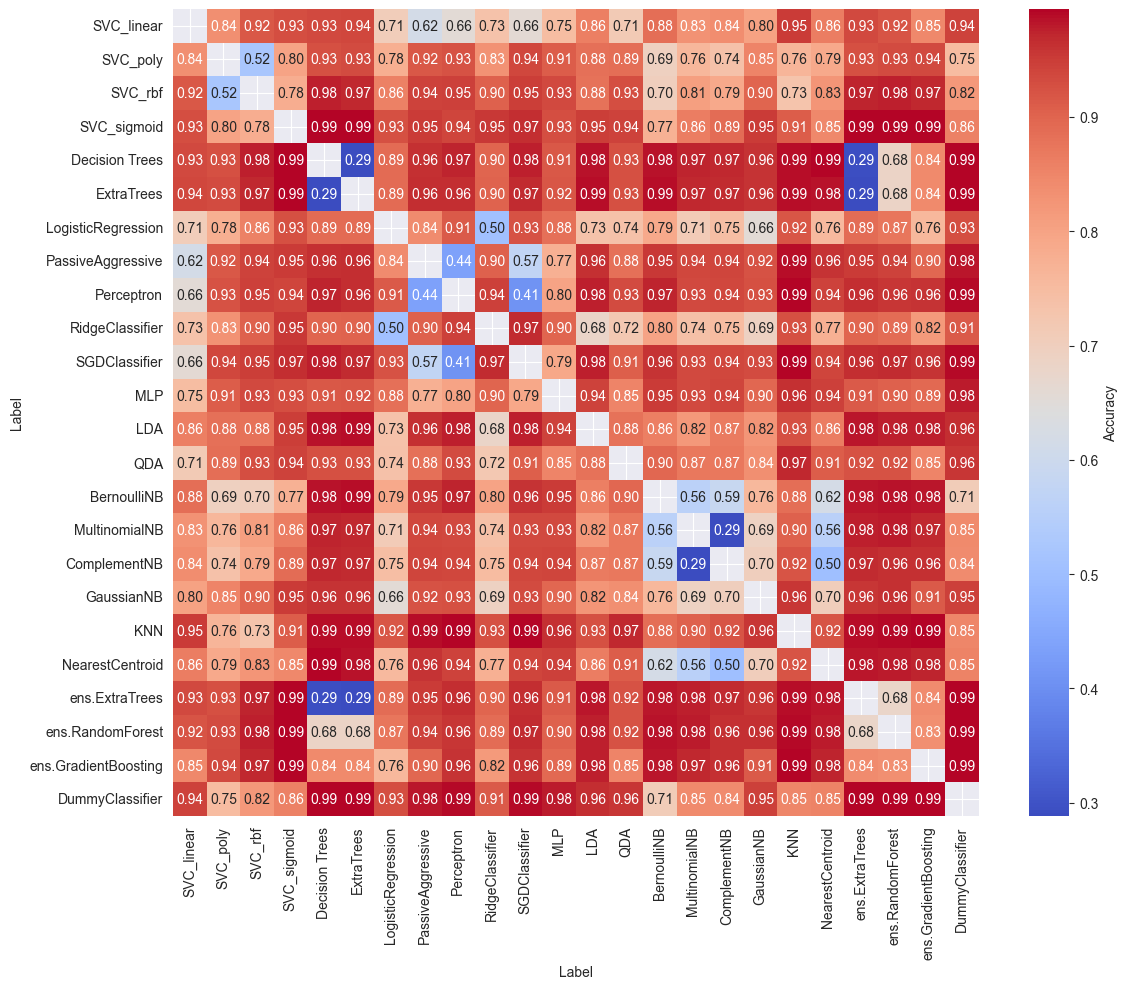

In [3]:
# load saved pairwise results
results_sorted = joblib.load('scores/experiment-pairwise-classification/train_results.joblib')

num_labels = 24

accuracy_matrix = np.full((num_labels, num_labels), np.nan)

# fill matrix with accuracies from results
for acc, (label_a, label_b), _, _ in results_sorted:
    accuracy_matrix[label_a, label_b] = acc
    accuracy_matrix[label_b, label_a] = acc

plt.figure(figsize=(12, 10))
sns.heatmap(
    accuracy_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Accuracy'},
    xticklabels=[LEARNER_ZOO[i] for i in range(num_labels)],
    yticklabels=[LEARNER_ZOO[i] for i in range(num_labels)]
)
plt.xlabel("Label")
plt.ylabel("Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/train_pairwise_acc_matrix.png", dpi=300)
plt.show()

In [11]:
all_accuracies = []
all_confusion_matrices = []
all_classification_reports = []
all_label_pairs = []

for label_a, label_b in get_all_pairs():
    cleaned_curves, cleaned_labels = clean_curves(test_curves, labels, 50, [label_a, label_b])
    
    if len(cleaned_curves) == 0:
        continue  # skip empty cases
    
    MAX_LEN = max(len(c) for c in cleaned_curves)

    # pad sequences
    padded_curves = pad_sequences(cleaned_curves, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post')
    
    # convert to numpy arrays
    X = np.array(padded_curves)
    y = np.array(cleaned_labels)
    X, y = shuffle(X, y, random_state=42)

    clf = RocketClassifier(rocket_transform='minirocket')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True, target_names=[LEARNER_ZOO[i] for i in [label_a, label_b]])

    # store results
    all_accuracies.append(acc)
    all_confusion_matrices.append(cm)
    all_classification_reports.append(report)
    all_label_pairs.append((label_a, label_b))
    
    print(f"Finished for labels {label_a} and {label_b}")
    
results = list(zip(all_accuracies, all_label_pairs, all_confusion_matrices, all_classification_reports))

# sort by accuracy (descending)
results_sorted = sorted(results, key=lambda x: x[0], reverse=True)

joblib.dump(results_sorted, 'scores/experiment-pairwise-classification/test_results.joblib')

Finished for labels 0 and 1
Finished for labels 0 and 2
Finished for labels 0 and 3
Finished for labels 0 and 4
Finished for labels 0 and 5
Finished for labels 0 and 6
Finished for labels 0 and 7
Finished for labels 0 and 8
Finished for labels 0 and 9
Finished for labels 0 and 10
Finished for labels 0 and 11
Finished for labels 0 and 12
Finished for labels 0 and 13
Finished for labels 0 and 14
Finished for labels 0 and 15
Finished for labels 0 and 16
Finished for labels 0 and 17
Finished for labels 0 and 18
Finished for labels 0 and 19
Finished for labels 0 and 20
Finished for labels 0 and 21
Finished for labels 0 and 22
Finished for labels 0 and 23
Finished for labels 1 and 2
Finished for labels 1 and 3
Finished for labels 1 and 4
Finished for labels 1 and 5
Finished for labels 1 and 6
Finished for labels 1 and 7
Finished for labels 1 and 8
Finished for labels 1 and 9
Finished for labels 1 and 10
Finished for labels 1 and 11
Finished for labels 1 and 12
Finished for labels 1 and 13
Fi

['scores/experiment-pairwise-classification/test_results.joblib']

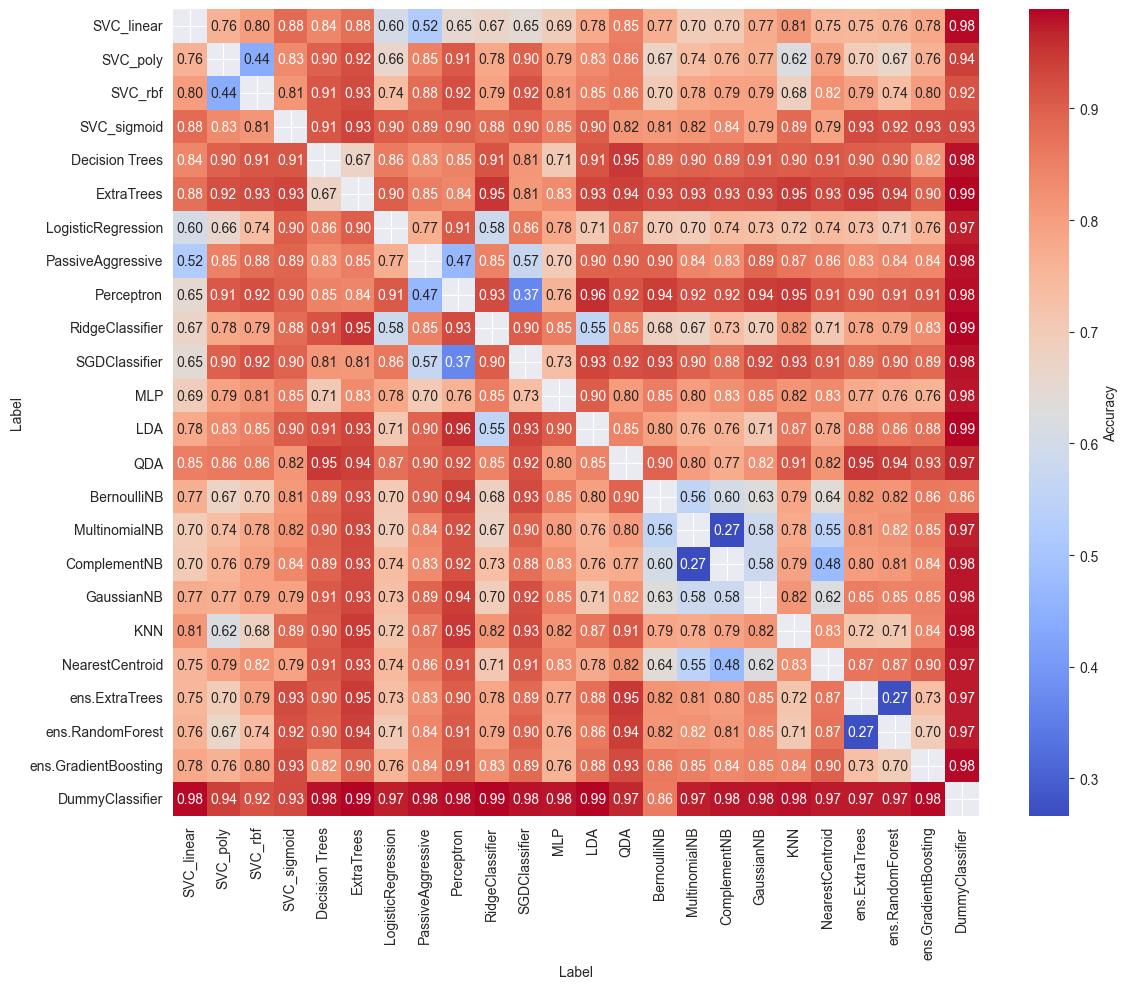

In [12]:
# load saved pairwise results
results_sorted = joblib.load('scores/experiment-pairwise-classification/test_results.joblib')

num_labels = 24

accuracy_matrix = np.full((num_labels, num_labels), np.nan)

# fill matrix with accuracies from results
for acc, (label_a, label_b), _, _ in results_sorted:
    accuracy_matrix[label_a, label_b] = acc
    accuracy_matrix[label_b, label_a] = acc

plt.figure(figsize=(12, 10))
sns.heatmap(
    accuracy_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Accuracy'},
    xticklabels=[LEARNER_ZOO[i] for i in range(num_labels)],
    yticklabels=[LEARNER_ZOO[i] for i in range(num_labels)]
)
plt.xlabel("Label")
plt.ylabel("Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/test_pairwise_acc_matrix.png", dpi=300)
plt.show()

In [13]:
all_accuracies = []
all_confusion_matrices = []
all_classification_reports = []
all_label_pairs = []

for label_a, label_b in get_all_pairs():
    cleaned_curves, cleaned_labels = clean_curves(valid_curves, labels, 50, [label_a, label_b])
    
    if len(cleaned_curves) == 0:
        continue  # skip empty cases
    
    MAX_LEN = max(len(c) for c in cleaned_curves)

    # pad sequences
    padded_curves = pad_sequences(cleaned_curves, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post')
    
    # convert to numpy arrays
    X = np.array(padded_curves)
    y = np.array(cleaned_labels)
    X, y = shuffle(X, y, random_state=42)

    clf = RocketClassifier(rocket_transform='minirocket')

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True, target_names=[LEARNER_ZOO[i] for i in [label_a, label_b]])

    # store results
    all_accuracies.append(acc)
    all_confusion_matrices.append(cm)
    all_classification_reports.append(report)
    all_label_pairs.append((label_a, label_b))
    
    print(f"Finished for labels {label_a} and {label_b}")
    
results = list(zip(all_accuracies, all_label_pairs, all_confusion_matrices, all_classification_reports))

# sort by accuracy (descending)
results_sorted = sorted(results, key=lambda x: x[0], reverse=True)

joblib.dump(results_sorted, 'scores/experiment-pairwise-classification/validation_results.joblib')

Finished for labels 0 and 1
Finished for labels 0 and 2
Finished for labels 0 and 3
Finished for labels 0 and 4
Finished for labels 0 and 5
Finished for labels 0 and 6
Finished for labels 0 and 7
Finished for labels 0 and 8
Finished for labels 0 and 9
Finished for labels 0 and 10
Finished for labels 0 and 11
Finished for labels 0 and 12
Finished for labels 0 and 13
Finished for labels 0 and 14
Finished for labels 0 and 15
Finished for labels 0 and 16
Finished for labels 0 and 17
Finished for labels 0 and 18
Finished for labels 0 and 19
Finished for labels 0 and 20
Finished for labels 0 and 21
Finished for labels 0 and 22
Finished for labels 0 and 23
Finished for labels 1 and 2
Finished for labels 1 and 3
Finished for labels 1 and 4
Finished for labels 1 and 5
Finished for labels 1 and 6
Finished for labels 1 and 7
Finished for labels 1 and 8
Finished for labels 1 and 9
Finished for labels 1 and 10
Finished for labels 1 and 11
Finished for labels 1 and 12
Finished for labels 1 and 13
Fi

['scores/experiment-pairwise-classification/validation_results.joblib']

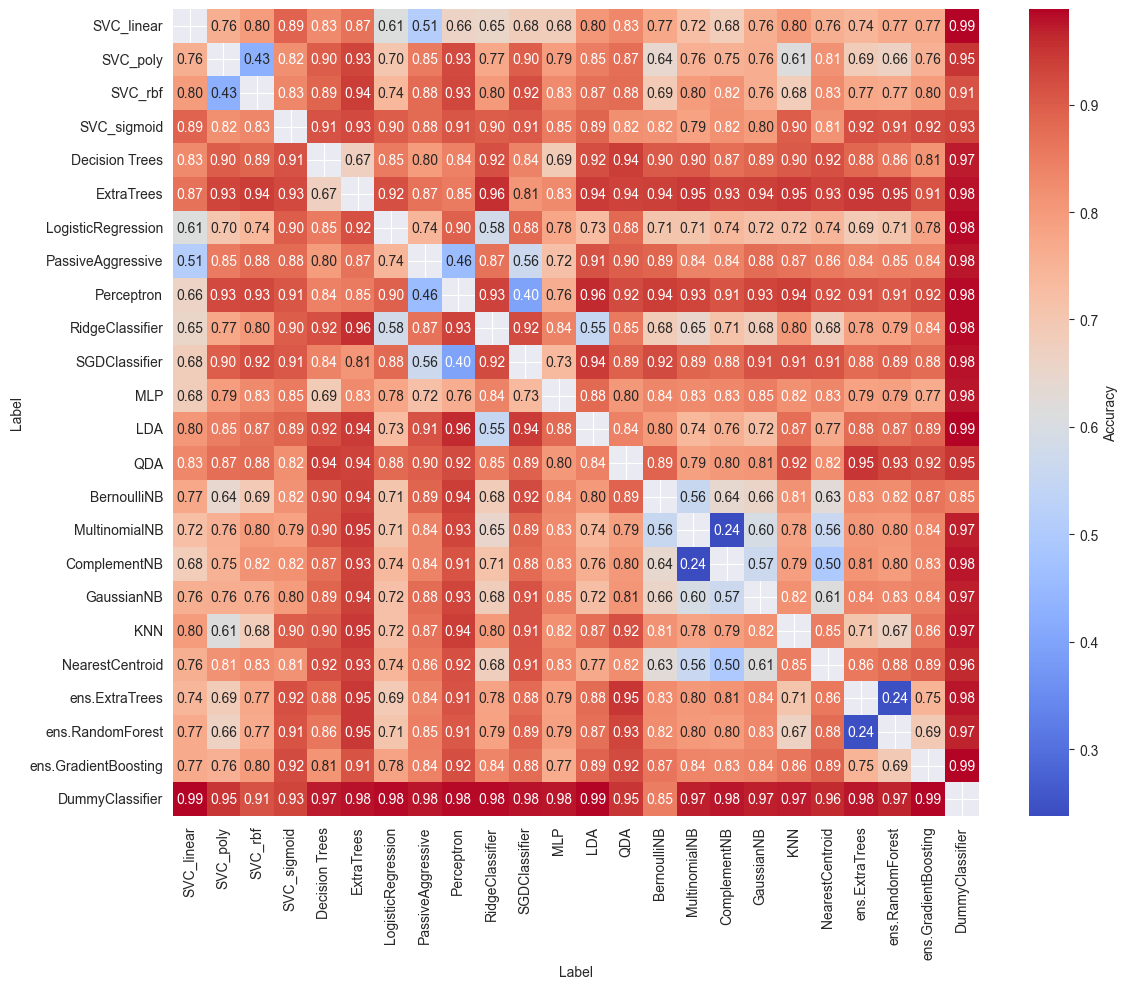

In [14]:
# load saved pairwise results
results_sorted = joblib.load('scores/experiment-pairwise-classification/validation_results.joblib')

num_labels = 24

accuracy_matrix = np.full((num_labels, num_labels), np.nan)

# fill matrix with accuracies from results
for acc, (label_a, label_b), _, _ in results_sorted:
    accuracy_matrix[label_a, label_b] = acc
    accuracy_matrix[label_b, label_a] = acc

plt.figure(figsize=(12, 10))
sns.heatmap(
    accuracy_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Accuracy'},
    xticklabels=[LEARNER_ZOO[i] for i in range(num_labels)],
    yticklabels=[LEARNER_ZOO[i] for i in range(num_labels)]
)
plt.xlabel("Label")
plt.ylabel("Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/validation_pairwise_acc_matrix.png", dpi=300)
plt.show()

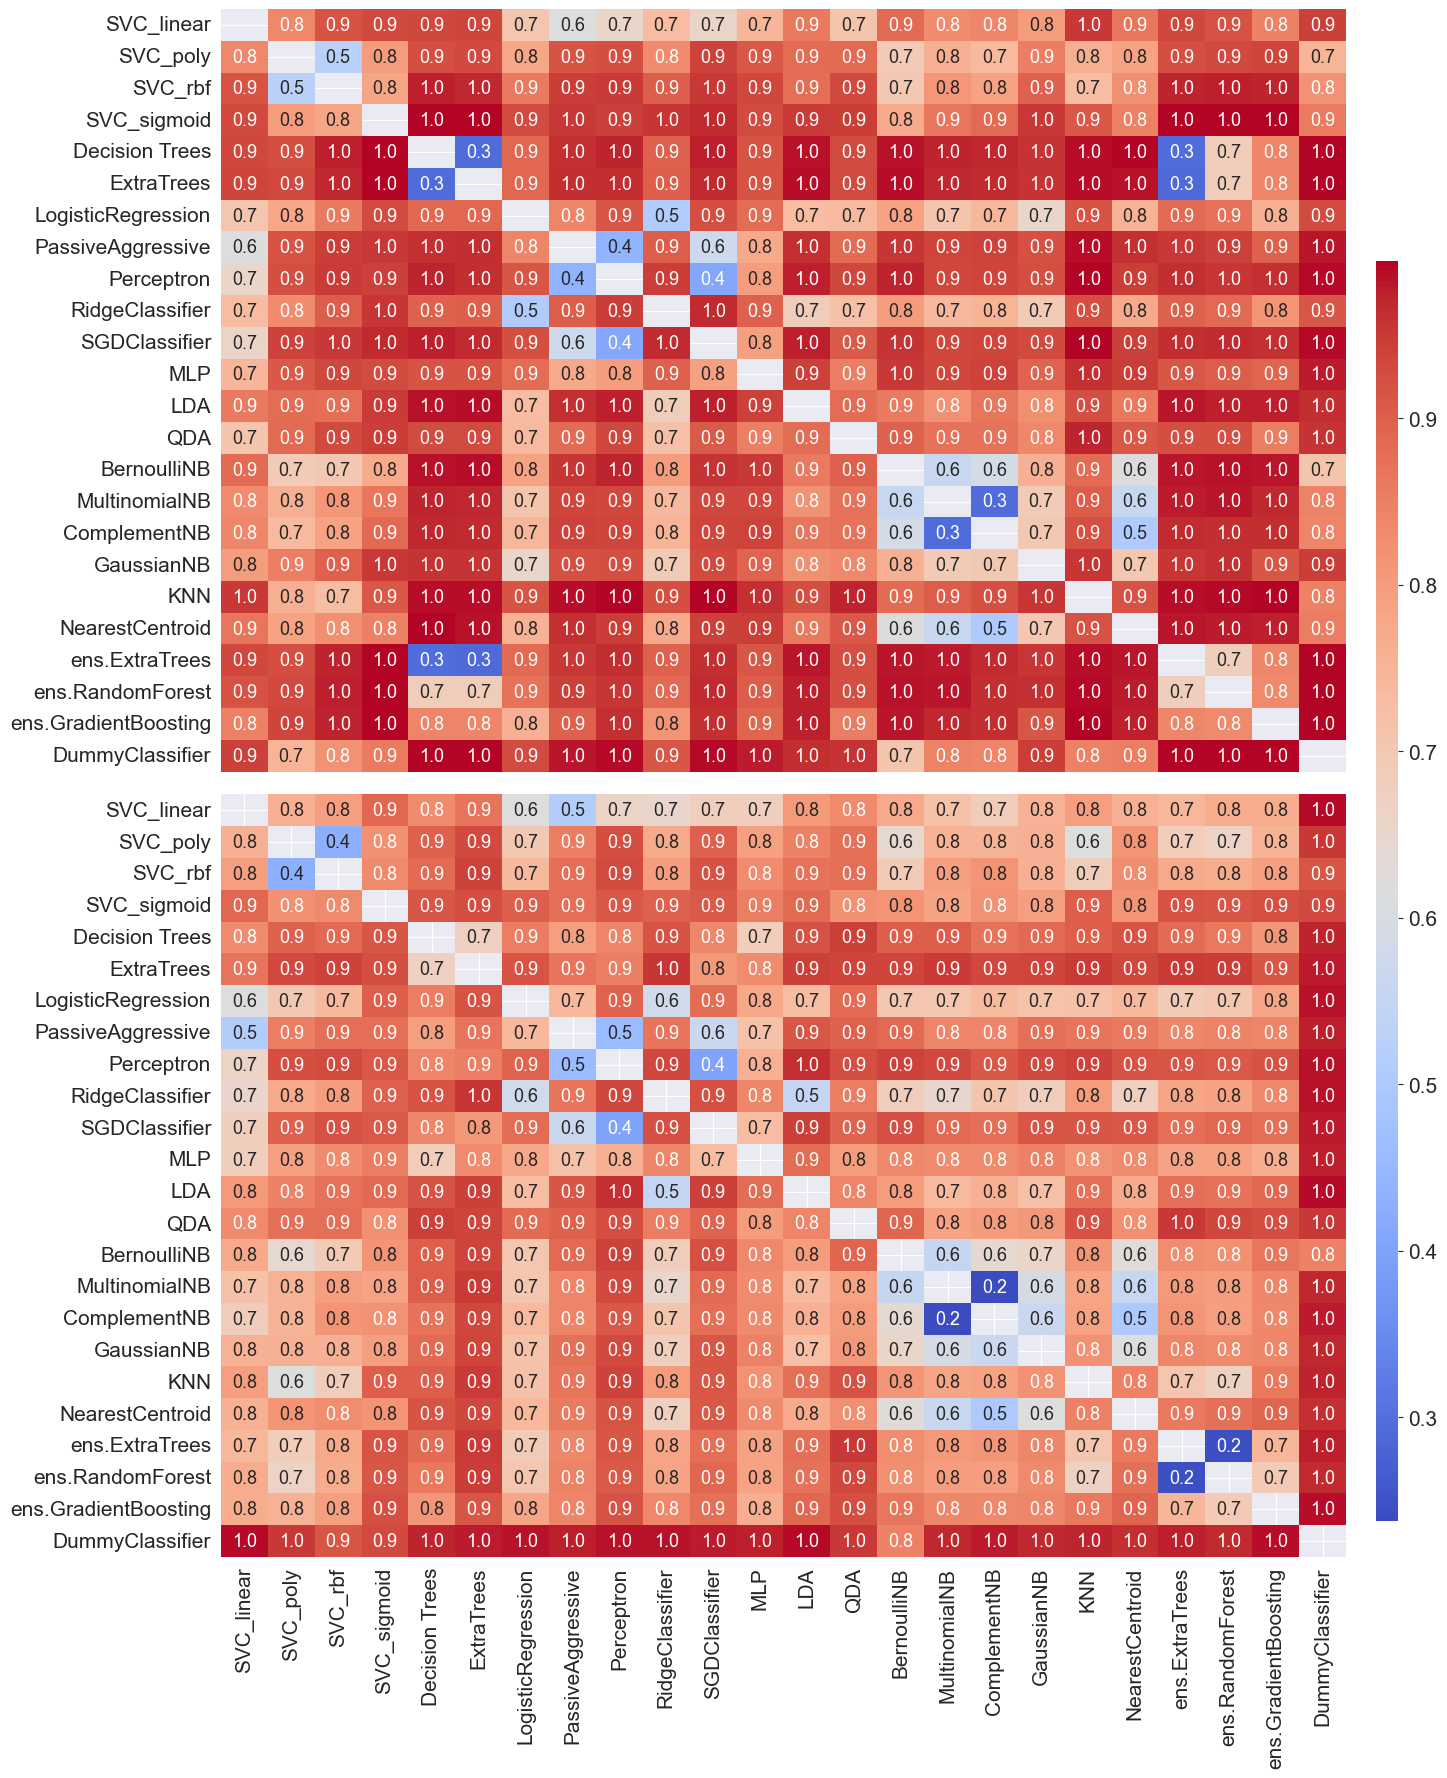

In [53]:
train_results = joblib.load('scores/experiment-pairwise-classification/train_results.joblib')
val_results = joblib.load('scores/experiment-pairwise-classification/validation_results.joblib')

num_labels = 24

train_matrix = np.full((num_labels, num_labels), np.nan)
val_matrix = np.full((num_labels, num_labels), np.nan)

# fill train matrix
for acc, (label_a, label_b), _, _ in train_results:
    train_matrix[label_a, label_b] = acc
    train_matrix[label_b, label_a] = acc

# fill validation matrix
for acc, (label_a, label_b), _, _ in val_results:
    val_matrix[label_a, label_b] = acc
    val_matrix[label_b, label_a] = acc

fig, axes = plt.subplots(2, 1, figsize=(15, 18), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.03})

# shared color scale across both heatmaps
vmin = min(np.nanmin(train_matrix), np.nanmin(val_matrix))
vmax = max(np.nanmax(train_matrix), np.nanmax(val_matrix))
cmap = "coolwarm"

plt.rcParams.update({
    'font.size': 13,        
    'axes.labelsize': 15, 
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 12
})

# Heatmap 1: Train
sns.heatmap(
    train_matrix,
    ax=axes[0],
    annot=True,
    fmt=".1f",
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
    xticklabels=False,
    yticklabels=[LEARNER_ZOO[i] for i in range(num_labels)]
)
axes[0].tick_params(axis='x', rotation=90)

# Heatmap 2: Validation
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # x, y, width, height in figure coords

hm = sns.heatmap(
    val_matrix,
    ax=axes[1],
    annot=True,
    fmt=".1f",
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=True,
    cbar_ax=cbar_ax,
    xticklabels=[LEARNER_ZOO[i] for i in range(num_labels)],
    yticklabels=[LEARNER_ZOO[i] for i in range(num_labels)]
)
axes[1].tick_params(axis='x', rotation=90)

plt.subplots_adjust(left=0.15, right=0.9, top=0.99, bottom=0.13, hspace=0.3)
plt.savefig("plots/vert_combined_pairwise_acc_matrix.png")
plt.show()

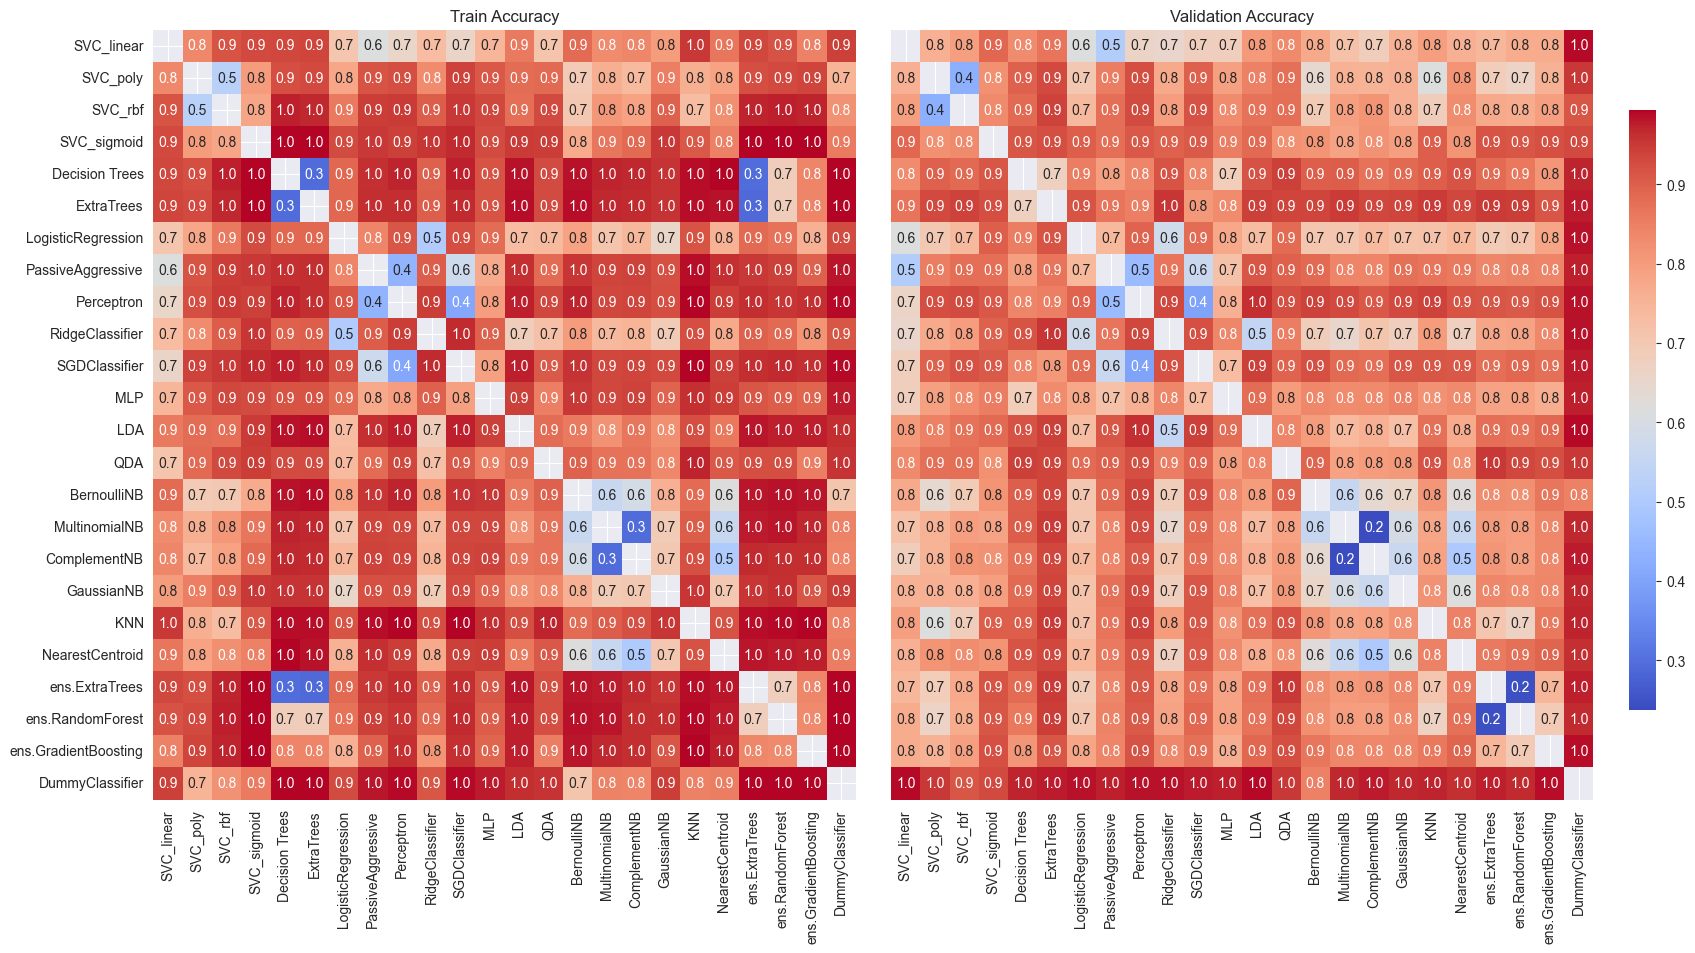

In [21]:
train_results = joblib.load('scores/experiment-pairwise-classification/train_results.joblib')
val_results = joblib.load('scores/experiment-pairwise-classification/validation_results.joblib')

num_labels = 24

train_matrix = np.full((num_labels, num_labels), np.nan)
val_matrix = np.full((num_labels, num_labels), np.nan)

# fill train matrix
for acc, (label_a, label_b), _, _ in train_results:
    train_matrix[label_a, label_b] = acc
    train_matrix[label_b, label_a] = acc

# fill validation matrix
for acc, (label_a, label_b), _, _ in val_results:
    val_matrix[label_a, label_b] = acc
    val_matrix[label_b, label_a] = acc

fig, axes = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.05})

# shared color scale across both heatmaps
vmin = min(np.nanmin(train_matrix), np.nanmin(val_matrix))
vmax = max(np.nanmax(train_matrix), np.nanmax(val_matrix))
cmap = "coolwarm"

# Heatmap 1: Train
sns.heatmap(
    train_matrix,
    ax=axes[0],
    annot=True,
    fmt=".1f",
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=False,
    xticklabels=[LEARNER_ZOO[i] for i in range(num_labels)],
    yticklabels=[LEARNER_ZOO[i] for i in range(num_labels)]
)
axes[0].set_title("Train Accuracy")
axes[0].tick_params(axis='x', rotation=90)

# Heatmap 2: Validation
hm = sns.heatmap(
    val_matrix,
    ax=axes[1],
    annot=True,
    fmt=".1f",
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar=True,
    cbar_ax=fig.add_axes([0.92, 0.27, 0.015, 0.6]),  # colorbar position
    xticklabels=[LEARNER_ZOO[i] for i in range(num_labels)],
    yticklabels=False  # hide y-ticks on second heatmap
)
axes[1].set_title("Validation Accuracy")
axes[1].tick_params(axis='x', rotation=90)

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.18, wspace=0.05)
plt.savefig("plots/combined_pairwise_acc_matrix.png")
plt.show()